# Data Cleaning and Manipulation

In [43]:
import pandas as pd

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Adjust the width to display everything
pd.set_option('display.max_colwidth', None)  # Show full column content

import datetime as dt

import fasttext
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [44]:
# read csv files
biden_df = pd.read_csv(r"C:\Users\User\iCloudDrive\Cursos\Data Circle\DataCircle_Twitter_Project\hashtag_joebiden.csv",lineterminator='\n')
trump_df = pd.read_csv(r"C:\Users\User\iCloudDrive\Cursos\Data Circle\DataCircle_Twitter_Project\hashtag_donaldtrump.csv", lineterminator='\n')

print(biden_df.info())
print(trump_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776886 entries, 0 to 776885
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            776886 non-null  object 
 1   tweet_id              776886 non-null  float64
 2   tweet                 776886 non-null  object 
 3   likes                 776886 non-null  float64
 4   retweet_count         776886 non-null  float64
 5   source                776173 non-null  object 
 6   user_id               776886 non-null  float64
 7   user_name             776861 non-null  object 
 8   user_screen_name      776886 non-null  object 
 9   user_description      694877 non-null  object 
 10  user_join_date        776886 non-null  object 
 11  user_followers_count  776886 non-null  float64
 12  user_location         543092 non-null  object 
 13  lat                   355293 non-null  float64
 14  long                  355293 non-null  float64
 15  

## Data Preprocessing

In [45]:
# create a new column 'candidate' to differentiate tweets of each candidate after concatenation 
trump_df['candidate'] = 'trump'

# biden dataframe 
biden_df['candidate'] = 'biden'

# combining the dataframes 
twitter_df = pd.concat([trump_df, biden_df])


In [56]:
twitter_df

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at,candidate
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice que #DonaldTrump solo se preocupa por él mismo. El demócrata fue anfitrión de encuentros de electores en #PembrokePines y #Miramar. Clic AQUÍ ⬇️⬇️⬇️\n⠀\n🌐https://t.co/qhIWpIUXsT\n_\n#ElSolLatino #yobrilloconelsol https://t.co/6FlCBWf1Mi,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa este de #EEUU\n⠀⏹️ Facebook e Instagram\n⠀🏙️ Philadelphia: /elsollatinonewspaper\n⠀🌅 Miami: /elsollatinonewsmiami,2011-08-23 15:33:45,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,trump
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: coprono Biden #donaldtrump https://t.co/6ceURhe1VP https://t.co/94jidLjoON",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie sul sito https://t.co/sC5iMbymSN e sul canale 51 del digitale terrestre,2011-07-08 13:12:20,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530,trump
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years, for ten years, I heard China! In 2019! And we have 1.5 and they don't know how many we have and I asked them how many do we have and they said 'sir we don't know.' But we have millions. Like 300 million.\n\nUm. What?",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger, commentator. Civics nerd. She/Her",2007-08-26 05:56:11,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,trump
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he is VERY busy. Tremendously busy.,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we be worried?",2017-02-05 21:32:17,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591,trump
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s rally #Iowa https://t.co/jJalUUmh5D,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,covering Capitol Hill &DC politics in Arabic for 15+yrs. Mom of identical twins. Beach, chocolate & gym lover.",2009-06-15 19:05:35,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121,trump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776881,2020-11-08 23:59:38,1.325589e+18,Stop laying @CNN !\n#Paris and #London dont give a fuck about #biden and we Know that we have to wait until the end of élections #trump maybe the POTUS again 😂! https://t.co/HIPRlVxEWX,0.0,0.0,Twitter for iPhone,3.873620e+08,flaquet,flaquet1,NaN,2011-10-08 22:42:56,27.0,PARIS,48.856697,2.351462,Paris,France,Europe,Ile-de-France,IDF,2020-11-09 18:32:45.613547,biden
776882,2020-11-08 23:59:38,1.325589e+18,Ωχ ελπίζω να μη μας βγει σαν τους οπαδούς του 😱 #Biden https://t.co/DUqGJPzPxP,0.0,0.0,Twitter for Android,4.032819e+08,οχι άλλο κάρβουνο 🇬🇷🗣🗣🗣,anapodoi,ακραία καιρικά φαινόμενα... ζήσαμε και απόψε,2011-11-02 08:39:46,772.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 18:32:45.947617,biden
776883,2020-11-08 23:59:41,1.325589e+18,"L'OTAN va sortir de sa léthargie et redevenir le cheval de Troie des intérêts américains. Quelle bonne nouvelle pour l'Europe : vassale elle était, vassale elle restera. Ceux qui saluent la victoire de #Biden sont des crétins finis. #Election2020 https://t.co/fLL97rXH9A",48.0,14.0,Twitter for Android,7.819183e+17,🇫🇷 Alt-Droite (m

In [33]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1747805 entries, 0 to 776885
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   created_at            object 
 1   tweet_id              float64
 2   tweet                 object 
 3   likes                 float64
 4   retweet_count         float64
 5   source                object 
 6   user_id               float64
 7   user_name             object 
 8   user_screen_name      object 
 9   user_description      object 
 10  user_join_date        object 
 11  user_followers_count  float64
 12  user_location         object 
 13  lat                   float64
 14  long                  float64
 15  city                  object 
 16  country               object 
 17  continent             object 
 18  state                 object 
 19  state_code            object 
 20  collected_at          object 
 21  candidate             object 
dtypes: float64(7), object(15)
memory usage: 306.7+ M

In [34]:
twitter_df.isnull().sum()

created_at                    0
tweet_id                      0
tweet                         0
likes                         0
retweet_count                 0
source                     1589
user_id                       0
user_name                    47
user_screen_name              0
user_description         183277
user_join_date                0
user_followers_count          0
user_location            528756
lat                      946793
long                     946793
city                    1333746
country                  951278
continent                951243
state                   1166990
state_code              1202771
collected_at                  0
candidate                     0
dtype: int64

### Remove irrelevant data

In [46]:
# Remove irrelevant data ("user_name", "user_screen_name", "user_description")
twitter_df = twitter_df[['created_at', 'tweet_id', 'tweet', 'likes', 'retweet_count', 'source',
       'user_id', 'user_join_date', 'user_followers_count', 'user_location', 'city', 'country', 'state', 'candidate']]

### Drop duplicate values

In [47]:
# Drop duplicates based on 'tweet_id', 'tweet', and 'created_at'
twitter_df = twitter_df[~(twitter_df.duplicated(subset=['tweet_id', 'tweet', 'created_at'], keep=False))]

### Ensure data consistency

In [48]:
# Convert date columns to datetime
columns_to_datetime = ['created_at', 'user_join_date']
twitter_df[columns_to_datetime] = twitter_df[columns_to_datetime].apply(pd.to_datetime, errors='coerce')

In [49]:
# Function to convert selected columns to int
def convert_columns_to_int(df, columns):
    for column in columns:
        df[column] = pd.to_numeric(df[column], errors='coerce').astype('int64') 
    return df

columns_to_convert_int = ['likes', 'retweet_count', 'user_followers_count', 'tweet_id', "user_id"]
twitter_df = convert_columns_to_int(twitter_df, columns_to_convert_int)

In [8]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1299318 entries, 1 to 776885
Data columns (total 14 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   created_at            1299318 non-null  datetime64[ns]
 1   tweet_id              1299318 non-null  int64         
 2   tweet                 1299318 non-null  object        
 3   likes                 1299318 non-null  int64         
 4   retweet_count         1299318 non-null  int64         
 5   source                1298957 non-null  object        
 6   user_id               1299318 non-null  int64         
 7   user_join_date        1299318 non-null  datetime64[ns]
 8   user_followers_count  1299318 non-null  int64         
 9   user_location         902134 non-null   object        
 10  city                  301007 non-null   object        
 11  country               590204 non-null   object        
 12  state                 439309 non-null   object  

In [9]:
twitter_df

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_join_date,user_followers_count,user_location,city,country,state,candidate
1,2020-10-15 00:00:01,1316529222748430336,"Usa 2020, Trump contro Facebook e Twitter: coprono Biden #donaldtrump https://t.co/6ceURhe1VP https://t.co/94jidLjoON",26,9,Social Mediaset,331617619,2011-07-08 13:12:20,1067661,NaN,NaN,NaN,NaN,trump
2,2020-10-15 00:00:02,1316529228091846912,"#Trump: As a student I used to hear for years, for ten years, I heard China! In 2019! And we have 1.5 and they don't know how many we have and I asked them how many do we have and they said 'sir we don't know.' But we have millions. Like 300 million.\n\nUm. What?",2,1,Twitter Web App,8436472,2007-08-26 05:56:11,1185,Portland,Portland,United States of America,Oregon,trump
3,2020-10-15 00:00:02,1316529227471237120,2 hours since last tweet from #Trump! Maybe he is VERY busy. Tremendously busy.,0,0,Trumpytweeter,828355589206056960,2017-02-05 21:32:17,32,NaN,NaN,NaN,NaN,trump
4,2020-10-15 00:00:08,1316529252301451264,You get a tie! And you get a tie! #Trump ‘s rally #Iowa https://t.co/jJalUUmh5D,4,3,Twitter for iPhone,47413798,2009-06-15 19:05:35,5393,Washington DC,Washington,United States of America,District of Columbia,trump
5,2020-10-15 00:00:17,1316529291052675072,@CLady62 Her 15 minutes were over long time ago. Omarosa never represented the black community! #TheReidOut \n\nShe cried to #Trump begging for a job!,2,0,Twitter for Android,1138416104,2013-02-01 01:37:38,2363,"Perris,California",NaN,United States of America,California,trump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776880,2020-11-08 23:59:37,1325588821308821504,Hypocrite!\n\n#Biden \n#Covid_19 https://t.co/f7v8vm4vbv,2,0,Twitter Web App,958368465160691584,2018-01-30 15:57:02,541,Venus,NaN,NaN,NaN,biden
776882,2020-11-08 23:59:38,1325588825654095872,Ωχ ελπίζω να μη μας βγει σαν τους οπαδούς του 😱 #Biden https://t.co/DUqGJPzPxP,0,0,Twitter for Android,403281875,2011-11-02 08:39:46,772,NaN,NaN,NaN,NaN,biden
776883,2020-11-08 23:59:41,1325588838123757568,"L'OTAN va sortir de sa léthargie et redevenir le cheval de Troie des intérêts américains. Quelle bonne nouvelle pour l'Europe : vassale elle était, vassale elle restera. Ceux qui saluent la victoire de #Biden sont des crétins finis. #Election2020 https://t.co/fLL97rXH9A",48,14,Twitter for Android,781918265400492032,2016-09-30 18:06:56,15806,France,NaN,France,NaN,biden
776884,2020-11-08 23:59:52,1325588881346015232,"🌎\n\n“#congiuntifuoriregione”\n\n‘Sono felice per #JillBiden,mia cugina. La vorrei invitare[..] per conoscerci. È una grandissima emozione[..]’\nA parlare è Caterina Giacoppo,lontana cugina di #JillJacobs,la nuova First Lady,la moglie di #Biden\n(via @Adnkronos)https://t.co/P8ksr3tAKo",1,1,Twitter for iPhone,529331509,2012-03-19 12:07:06,5974,🌎,NaN,NaN,NaN,biden


In [50]:
# Function to clean the tweet column
def clean_tweet_column(df, tweet_column):

    # Work on a copy of the tweet column to avoid modifying the original
    tweet_cleaned = df[tweet_column].copy()

    # Clean and convert to lowercase
    tweet_cleaned = tweet_cleaned.str.lower().str.strip()

    # Replace '\n' with space ' '
    tweet_cleaned = tweet_cleaned.str.replace('\n', ' ')

    # Remove URLs
    url_pattern = r'http[s]?://\S+|www\.\S+'
    tweet_cleaned = tweet_cleaned.str.replace(url_pattern, '', regex=True)

    # Remove unwanted symbols (keeping letters, numbers, hashtags, and spaces)
    tweet_cleaned = tweet_cleaned.str.replace(r'[^a-zA-Z0-9# ]', '', regex=True)

    return tweet_cleaned

# Apply the function and assign the cleaned result to 'tweet_cleaned' without modifying 'tweet'
twitter_df["tweet_cleaned"] = clean_tweet_column(twitter_df, 'tweet')


In [51]:
# Ensure all text columns are lowercase for consistent NLP analysis.
def clean_and_convert_text_columns(df, text_columns):
    # Clean and convert text columns to lowercase
    for column in text_columns:
        df[column] = df[column].str.lower().str.strip()  # Convert to lowercase, remove leading and trailing spaces

    return df

# Return the names of object columns
text_columns_to_convert = ["source", "user_location", "city", "state", "country"]
twitter_df = clean_and_convert_text_columns(twitter_df, text_columns_to_convert)

In [17]:
twitter_df["country"].value_counts()

country
united states of america    270322
united states                48393
united kingdom               43705
germany                      23956
india                        23467
                             ...  
vanuatu                          1
northern mariana islands         1
saint lucia                      1
lesotho                          1
east timor                       1
Name: count, Length: 188, dtype: int64

In [52]:
# Create a mapping dictionary
country_mapping = {
    'united states of america': 'united states',
    'the netherlands': 'netherlands'
    }

# Standardize country names using the mapping
twitter_df['country'] = twitter_df['country'].replace(country_mapping)

### Handle missing values

In [19]:
twitter_df.isnull().sum()

created_at                   0
tweet_id                     0
tweet                        0
likes                        0
retweet_count                0
source                     361
user_id                      0
user_join_date               0
user_followers_count         0
user_location           397184
city                    998311
country                 709114
state                   860009
candidate                    0
tweet_cleaned                0
dtype: int64

In [53]:
# Fill missing values in the 'source' column with the most frequent value (mode)
twitter_df["source"] = twitter_df["source"].fillna(twitter_df["source"].mode()[0])

In [54]:
# Filter rows where user location is null and either lat, long, city, state or country is not null
twitter_df[(twitter_df["user_location"].isna()) & (~(twitter_df["city"].isna()) | ~(twitter_df["state"].isna()) | ~(twitter_df["country"].isna()))]

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_join_date,user_followers_count,user_location,city,country,state,candidate,tweet_cleaned


Based on the previous output, whenever the user location is null, lat, long, city, state and country will also be null. Which means user location column can not be filled with the other location columns

In [55]:
# Fill null location columns with "unknown"
twitter_df["user_location"] = twitter_df["user_location"].fillna("unkown")
twitter_df["city"] = twitter_df["city"].fillna("unkown")
twitter_df["state"] = twitter_df["state"].fillna("unkown")
twitter_df["country"] = twitter_df["country"].fillna("unkown")

In [23]:
twitter_df.isnull().sum()

created_at              0
tweet_id                0
tweet                   0
likes                   0
retweet_count           0
source                  0
user_id                 0
user_join_date          0
user_followers_count    0
user_location           0
city                    0
country                 0
state                   0
candidate               0
tweet_cleaned           0
dtype: int64

In [24]:
twitter_df.shape

(1299318, 15)

### Detect tweet language and filter only english tweets

In [56]:
# Load the FastText pre-trained language identification model
model = fasttext.load_model('lid.176.bin')

# Function to detect language
def detect_language(text):
    try:
        predictions = model.predict(text, k=1)  # Get top 1 language prediction
        lang_code = predictions[0][0].split("__label__")[1]  # Extract language code
        return lang_code
    except Exception as e:
        return 'unknown'  # Return 'unknown' for any errors

# Apply language detection to your "tweet" column 
twitter_df['language'] = twitter_df['tweet_cleaned'].apply(detect_language)

In [27]:
twitter_df['language'].value_counts()

language
en     1014005
es       66130
fr       48856
de       43348
it       33113
        ...   
arz          1
new          1
cv           1
ug           1
ne           1
Name: count, Length: 126, dtype: int64

In [28]:
twitter_df['language'].unique()

array(['it', 'en', 'fr', 'es', 'eu', 'fi', 'sr', 'da', 'de', 'pt', 'id',
       'uk', 'tr', 'nl', 'pl', 'zh', 'be', 'ceb', 'no', 'sv', 'ko', 'cs',
       'hr', 'ja', 'sl', 'sw', 'ur', 'ru', 'te', 'sk', 'et', 'ca', 'kn',
       'tl', 'th', 'nn', 'af', 'ms', 'hu', 'sh', 'as', 'so', 'ro', 'hi',
       'fy', 'la', 'lb', 'lt', 'war', 'oc', 'ia', 'is', 'vi', 'bn', 'el',
       'ta', 'ilo', 'jv', 'bs', 'ie', 'eo', 'km', 'az', 'gl', 'mr', 'als',
       'su', 'new', 'min', 'ml', 'fa', 'si', 'lv', 'ar', 'pam', 'cy',
       'my', 'uz', 'pa', 'nds', 'pnb', 'tt', 'arz', 'mg', 'sq', 'or',
       'ht', 'hy', 'azb', 'io', 'ka', 'ku', 'br', 'ast', 'bg', 'sco',
       'ug', 'ga', 'jbo', 'vo', 'cv', 'an', 'pms', 'mn', 'bh', 'tk',
       'hsb', 'yo', 'co', 'wa', 'rue', 'cbk', 'frr', 'bar', 'tg', 'lmo',
       'kk', 'mwl', 'gv', 'mt', 'mk', 'lo', 'vep', 'gd', 'diq', 'ne'],
      dtype=object)

In [57]:
# filter only twitter in english language
twitter_df = twitter_df[twitter_df['language']=='en']

In [58]:
# Drop language column
twitter_df = twitter_df.drop(columns='language')

In [31]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1014005 entries, 2 to 776880
Data columns (total 15 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   created_at            1014005 non-null  datetime64[ns]
 1   tweet_id              1014005 non-null  int64         
 2   tweet                 1014005 non-null  object        
 3   likes                 1014005 non-null  int64         
 4   retweet_count         1014005 non-null  int64         
 5   source                1014005 non-null  object        
 6   user_id               1014005 non-null  int64         
 7   user_join_date        1014005 non-null  datetime64[ns]
 8   user_followers_count  1014005 non-null  int64         
 9   user_location         1014005 non-null  object        
 10  city                  1014005 non-null  object        
 11  country               1014005 non-null  object        
 12  state                 1014005 non-null  object  

### Remove StopWords

In [59]:
# Get the list of stop words in English
stop_words = set(stopwords.words('english'))

# Define a function to remove stop words
def remove_stopwords(text):
     # Split the text into words by spaces, filter out stop words, and rejoin
    filtered_words = [word for word in text.split() if word not in stop_words]
    return ' '.join(filtered_words)

# Apply the function to the 'tweet' column
twitter_df['tweet_cleaned'] = twitter_df['tweet_cleaned'].apply(remove_stopwords)

In [34]:
twitter_df[["tweet", "tweet_cleaned"]]

,tweet,tweet_cleaned
2,"#Trump: As a student I used to hear for years, for ten years, I heard China! In 2019! And we have 1.5 and they don't know how many we have and I asked them how many do we have and they said 'sir we don't know.' But we have millions. Like 300 million.\n\nUm. What?",#trump student used hear years ten years heard china 2019 15 dont know many asked many said sir dont know millions like 300 million um
3,2 hours since last tweet from #Trump! Maybe he is VERY busy. Tremendously busy.,2 hours since last tweet #trump maybe busy tremendously busy
4,You get a tie! And you get a tie! #Trump ‘s rally #Iowa https://t.co/jJalUUmh5D,get tie get tie #trump rally #iowa
5,@CLady62 Her 15 minutes were over long time ago. Omarosa never represented the black community! #TheReidOut \n\nShe cried to #Trump begging for a job!,clady62 15 minutes long time ago omarosa never represented black community #thereidout cried #trump begging job
6,@richardmarx Glad u got out of the house! DICK!!#trump 2020💪🏽🇺🇸🇺🇸,richardmarx glad u got house dick#trump 2020
...,...,...
776870,The man needs some help...#usa #biden\nWhen will he just go.... https://t.co/f5Dj8sYT80,man needs help#usa #biden go
776874,@SamRamani2 #Biden camps announcement on Idlib is merely aimed at causing a wedge between developing #Russia-Turkey relations and Ankara views it as such. (2),samramani2 #biden camps announcement idlib merely aimed causing wedge developing #russiaturkey relations ankara views 2
776876,"Mr. #Biden, tear down that wall (with #Mexico)!!\nWhat’s that...?\n Never built...?\nJust mended existing fence...?\nTiny section that’s easily cut or climbed?\nOK, never mind.\nMr. Biden, reinstate #DACA and stop separating children, allow asylum seekers and end mass #deportation!! https://t.co/JRMpR2uq1k",mr #biden tear wall #mexico whats never built mended existing fence tiny section thats easily cut climbed ok never mind mr biden reinstate #daca stop separating children allow asylum seekers end mass #deportation
776878,@staceyabrams Thank you for all your support and hard work to the #Biden #Harris ticket You did it! ❤🏳️‍🌈🇺🇲🖤🤎🤍💙#BidenHarris2020,staceyabrams thank support hard work #biden #harris ticket #bidenharris2020


In [60]:
# Drop original tweet column
twitter_df = twitter_df.drop(columns="tweet")

In [36]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1014005 entries, 2 to 776880
Data columns (total 14 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   created_at            1014005 non-null  datetime64[ns]
 1   tweet_id              1014005 non-null  int64         
 2   likes                 1014005 non-null  int64         
 3   retweet_count         1014005 non-null  int64         
 4   source                1014005 non-null  object        
 5   user_id               1014005 non-null  int64         
 6   user_join_date        1014005 non-null  datetime64[ns]
 7   user_followers_count  1014005 non-null  int64         
 8   user_location         1014005 non-null  object        
 9   city                  1014005 non-null  object        
 10  country               1014005 non-null  object        
 11  state                 1014005 non-null  object        
 12  candidate             1014005 non-null  object  

### Handle Outliers

In [37]:
twitter_df.describe()


,created_at,tweet_id,likes,retweet_count,user_id,user_join_date,user_followers_count
count,1014005,1.014005e+06,1.014005e+06,1.014005e+06,1.014005e+06,1014005,1.014005e+06
mean,2020-10-30 20:29:35.947678464,1.322274e+18,7.462358e+00,1.702713e+00,4.466788e+17,2014-08-31 19:14:13.868067840,1.277936e+04
min,2020-10-15 00:00:02,1.316529e+18,0.000000e+00,0.000000e+00,5.310000e+02,1970-01-01 00:00:00,0.000000e+00
25%,2020-10-24 02:59:32,1.319836e+18,0.000000e+00,0.000000e+00,2.092006e+08,2010-10-28 18:21:28,6.800000e+01
50%,2020-11-02 13:49:32,1.323261e+18,0.000000e+00,0.000000e+00,2.372294e+09,2014-03-04 02:40:48,3.790000e+02
75%,2020-11-06 07:24:42,1.324614e+18,1.000000e+00,0.000000e+00,1.072176e+18,2018-12-10 16:39:31,1.800000e+03
max,2020-11-08 23:59:56,1.325589e+18,1.657020e+05,6.347300e+04,1.325581e+18,2020-11-08 23:27:09,8.241710e+07
std,NaN,2.679981e+15,3.389073e+02,8.300392e+01,5.542150e+17,NaN,2.717751e+05


In [38]:
print("likes skewness:")
print(twitter_df["likes"].skew())
print("\n")
print("likes kurtosis:")
print(twitter_df["likes"].kurtosis())
print("\n")
print("retweet skewness:")
print(twitter_df["retweet_count"].skew())
print("\n")
print("retweet kurtosis:")
print(twitter_df["retweet_count"].kurtosis())

likes skewness:
295.8179906542494


likes kurtosis:
116558.16960990644


retweet skewness:
491.00537692955555


retweet kurtosis:
345425.7731373069


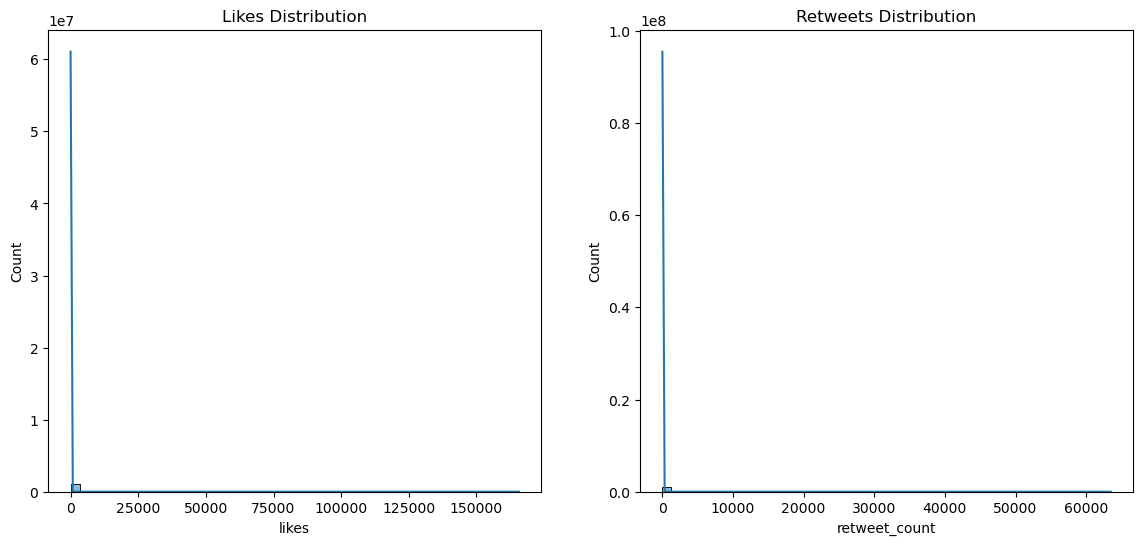

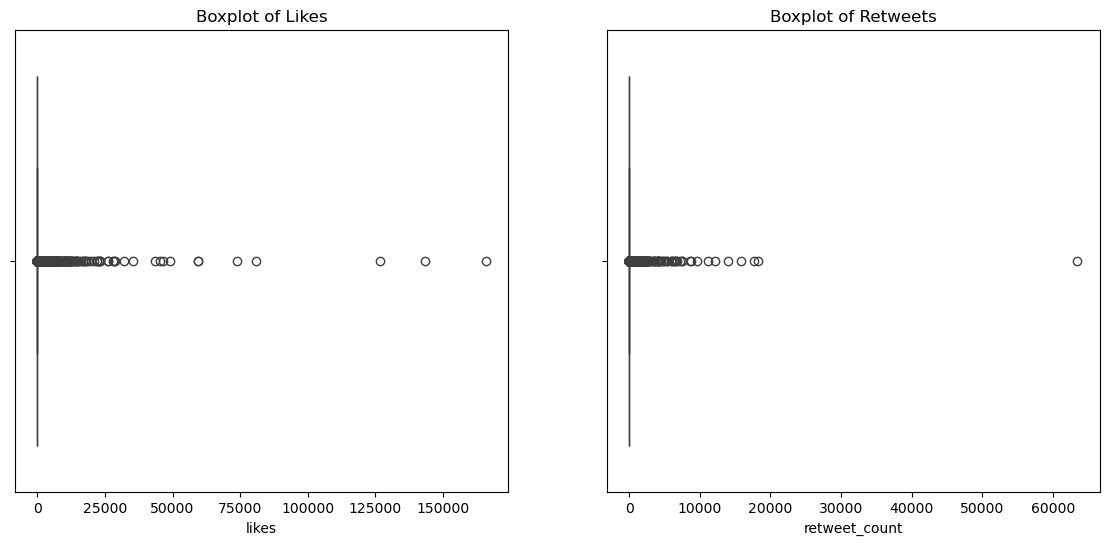

In [39]:
# Subset the data for 'likes' and 'retweets'
likes = twitter_df['likes']
retweets = twitter_df['retweet_count']

# 1. Histogram and KDE for 'likes' and 'retweets'
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(likes, bins=50, kde=True)
plt.title('Likes Distribution')

plt.subplot(1, 2, 2)
sns.histplot(retweets, bins=50, kde=True)
plt.title('Retweets Distribution')

plt.show()

# 2. Boxplot for 'likes' and 'retweets' (helps identify outliers)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=likes)
plt.title('Boxplot of Likes')

plt.subplot(1, 2, 2)
sns.boxplot(x=retweets)
plt.title('Boxplot of Retweets')

plt.show()

In [40]:
# Detect outliers using IQR for 'likes' and 'retweets'

# For 'likes'
Q1_likes = twitter_df['likes'].quantile(0.25)
Q3_likes = twitter_df['likes'].quantile(0.75)
IQR_likes = Q3_likes - Q1_likes

lower_bound_likes = Q1_likes - 3 * IQR_likes
upper_bound_likes = Q3_likes + 3 * IQR_likes

# For 'retweets'
Q1_retweets = twitter_df['retweet_count'].quantile(0.25)
Q3_retweets = twitter_df['retweet_count'].quantile(0.75)
IQR_retweets = Q3_retweets - Q1_retweets

lower_bound_retweets = Q1_retweets - 3 * IQR_retweets
upper_bound_retweets = Q3_retweets + 3 * IQR_retweets

# Identify outliers in 'likes' and 'retweets'
outliers_likes = twitter_df[(twitter_df['likes'] < lower_bound_likes) | (twitter_df['likes'] > upper_bound_likes)]
outliers_retweets = twitter_df[(twitter_df['retweet_count'] < lower_bound_retweets) | (twitter_df['retweet_count'] > upper_bound_retweets)]

print(f"Number of outliers in 'likes' using IQR: {len(outliers_likes)}")
print(f"Number of outliers in 'retweets' using IQR: {len(outliers_retweets)}")


Number of outliers in 'likes' using IQR: 90365
Number of outliers in 'retweets' using IQR: 172661


In [41]:
print(outliers_likes["likes"].describe())
print("\n")
print(outliers_retweets["retweet_count"].describe())

count     90365.000000
mean         77.772799
std        1132.883090
min           5.000000
25%           6.000000
50%          10.000000
75%          26.000000
max      165702.000000
Name: likes, dtype: float64


count    172661.000000
mean          9.999710
std         200.944827
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max       63473.000000
Name: retweet_count, dtype: float64


Observations:

Likes:
* The number of outliers decreased after using the 3x IQR factor, which means the bound have been tightened and fewer low outliers have been excluded .
* The mean, median, and standard deviation suggest that many of the outliers are still relatively small, but there are a few extreme values (as indicated by the high max of 165,702).

Retweets:
* The retweet outliers remain unchanged with the 3x IQR factor, indicating that the distribution of retweets may not be as heavily skewed at the lower end. 
* The presence of very low outliers (min = 1) suggests that many entries are being flagged due to the distribution's natural skew.

In [61]:
twitter_df.to_csv("twitter_cleaned_data.csv", index=False)